# Problem Set 5

## Matheus Azevedo Silva Pessôa


### Problem 1

With a method of relaxation solver, solve for the potential everywhere
in space. What does the charge density look like in your solution? What is
the charge per unit length? How does your solution compare to the analytic
one you might have expected?

 iterations = 558


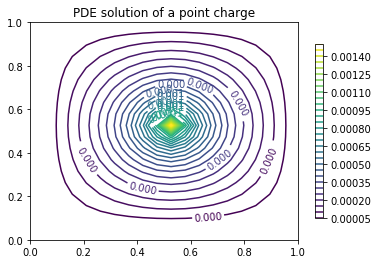

In [9]:
# point_charge .py - Iterative solution of 2-D PDE , electrostatics
import matplotlib
import numpy as np
import matplotlib . pyplot as plt
# Set dimensions of the problem
L = 1.0
N = 20
ds = L/N
# Define arrays used for plotting
x = np. linspace (0,L,N)
y = np.copy(x)
X, Y = np. meshgrid (x,y)
# Make the charge density matrix
rho0 = 1.0
rho = np. zeros ((N,N))
rho[int( round(N/2.0)) , int(round (N /2.0))] = rho0
# Make the initial guess for solution matrix
V = np. zeros ((N,N))
# Solver
iterations = 0
eps = 1e-8 # Convergence threshold
error = 1e4 # Large dummy error
while iterations < 1e4 and error > eps:
    V_temp = np.copy(V)
    error = 0 # we make this accumulate in the loop
    for j in range (2,N -1):
        for i in range (2,N -1):
            V[i,j] = 0.25*( V_temp [i+1,j] + V_temp [i-1,j] + V_temp [i,j -1] + V_temp [i,j+1] + rho[i,j]* ds **2)
            error += abs(V[i,j]- V_temp [i,j])
    iterations += 1
    error /= float(N)
print " iterations =",iterations

# Plotting
#matplotlib.rcParams ['xtick. direction'] = 'out'
#matplotlib.rcParams ['ytick. direction'] = 'out'
CS = plt.contour (X,Y,V ,30) # Make a contour plot
plt.clabel (CS , inline =1, fontsize =10)
plt.title ('PDE solution of a point charge')
CB = plt.colorbar (CS , shrink =0.8 , extend ='both')
plt.show ()

### Problem 5

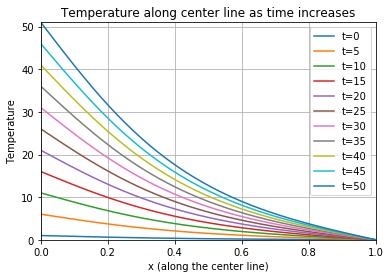

In [13]:
def Ax_2d(mat, mask, copy=False):
    '''
    Returns the coefficient matrix A multiplied by the vector of unknowns x for a 2-dimensional linear problem given by Ax=b.
    '''
    if copy:
        mat = mat.copy()
    mat[mask] = 0
    mm = 4*mat
    # Roll the matrix side-to-side, up and down to add up all contibutions from adjacent cells.
    mm[:,:-1] = mm[:,:-1] - mat[:,1:]
    mm[:,1:] = mm[:,1:] - mat[:,:-1]
    mm[1:,:] = mm[1:,:] - mat[:-1,:]
    mm[:-1,:] = mm[:-1,:] - mat[1:,:]
    mm[mask] = 0
    return mm

def RHS_2d(pot, mask):
    '''
    Returns the matrix of the boundary conditions effect on each grid cell in a 2-dimensional linear problem given by Ax=b.
    '''
    mat = np.zeros(pot.shape)
    # Roll the matrix to each side, up and down by 1 cell to add up all boundary conditions from adjacent cells.
    mat[:,:-1] = mat[:,:-1] + pot[:,1:]
    mat[:,1:] = mat[:,1:] + pot[:,:-1]
    mat[:-1,:] = mat[:-1,:] + pot[1:,:]
    mat[1:,:] = mat[1:,:] + pot[:-1,:]
    # Reset the masked cells to zero.
    mat[mask] = 0
    return mat

def CG(rhs, x0, mask, niter=100, tolerance=0.00001, verbose=True):
    '''
    Returns the solution x to the linear problem given by Ax=b using the conjugate gradient algorithm.
        x0: the initial guess for the solution
    '''
    Ax = Ax_2d(x0, mask)
    r = rhs - Ax # the residual
    p = r.copy()
    x = x0.copy()
    rsqr = np.sum(r*r)
#     print('starting rsqr is ',rsqr)
    for k in range(niter):
        Ap = Ax_2d(p, mask)
        alpha = np.sum(r*r)/np.sum(Ap*p)
        x = x + alpha*p
        r = r - alpha*Ap
        rsqr_new = np.sum(r*r)
        
        # Break out of the loop and return x if value of the new residual is less than some tolerance in every grid cell
        if np.sqrt(rsqr_new) < tolerance*len(r):
            if verbose:
                print('Conjugate gradient method converged after {:d} iterations.'.format(k))
            break
        elif k == niter-1:
            print('Conjugate gradient method did not converge after {:d} iterations'.format(k+1))
            break
        
        beta = rsqr_new/rsqr
        p = r + beta*p
        rsqr = rsqr_new
#     print('final rsqr is ', rsqr)
    return x

# Number of interior gridpoints:
N = 256
# The temperature of the left wall (x=0) will be raised by dT every time step.
dT = 1
# Number of time steps:
nstep = 50

# Initialize the N x N temperature array.
# Start all grid cells at T=0, then update the temperature along the left wall for every time step.
T = np.zeros([N,N])

# Initialize the mask array
mask = np.zeros([N,N], dtype='bool')
mask[0,:] = 1
mask[:,0] = 1
mask[-1,:] = 1
mask[:,-1] = 1

# Initialize an array to hold onto the solution along the center line at every time step
x_all = np.zeros([nstep+1, N])

T[:,0] += dT # update the left wall's temperature
rhs = RHS_2d(T, mask)
x = CG(rhs, 0*rhs, mask, niter=1000, verbose=False)
x[mask] = T[mask]
x_all[0] = x[int(N/2)] # hold onto the solution along the center line (x-axis)

for i in range(1,nstep+1):
    x0 = x # use the last timestep as the guess for the next one
    T[:,0] += dT
    rhs = RHS_2d(T, mask)
    x = CG(rhs, x0, mask, niter=1000, verbose=False)
    x[mask] = T[mask]
    x_all[i] = x[int(N/2)]  # hold onto the solution along the center line (x-axis)

plt.title('Temperature along center line as time increases')
plt.plot(np.linspace(0,1,N), x_all[::int(nstep/10)].T)
plt.ylabel('Temperature')
plt.xlabel('x (along the center line)')
plt.xlim(0,1)
plt.ylim(0,nstep*dT+dT)
plt.legend(['t={:d}'.format(int(i*5)) for i in range(int(nstep/5+1))])
plt.grid()
plt.show()

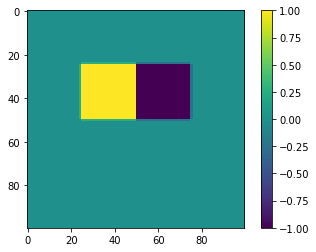

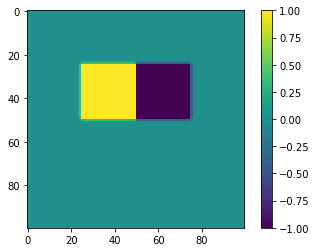

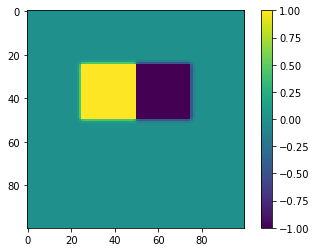

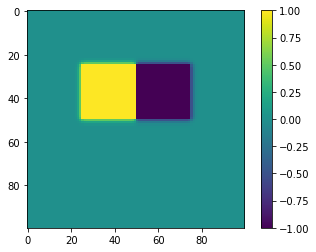

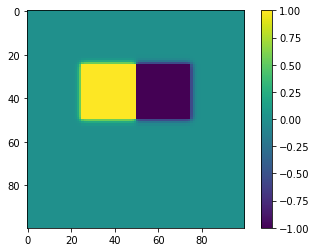

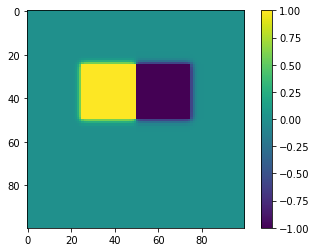

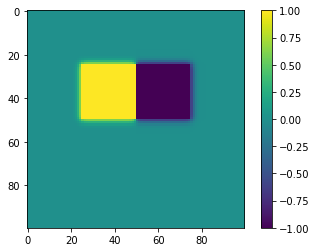

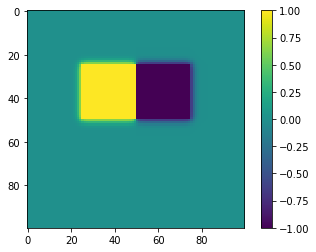

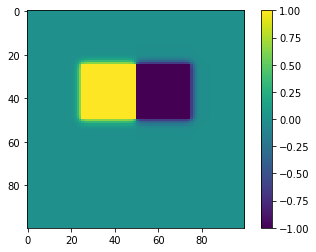

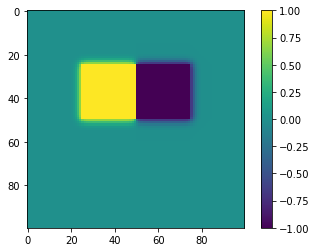

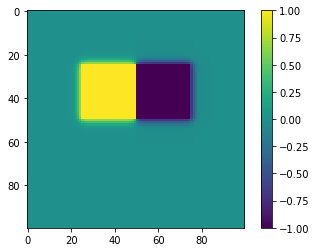

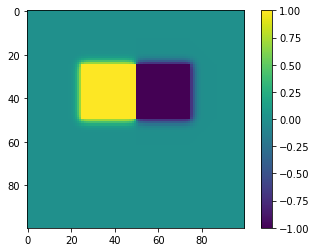

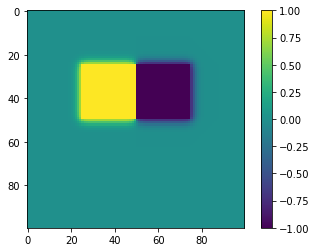

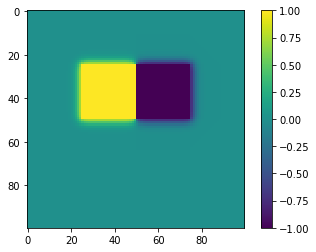

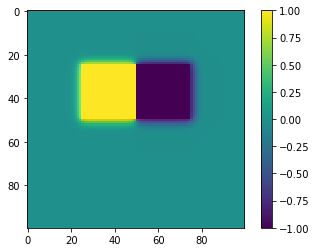

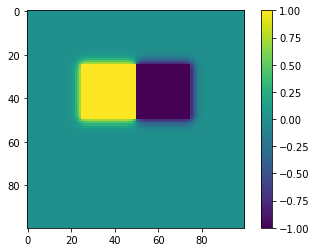

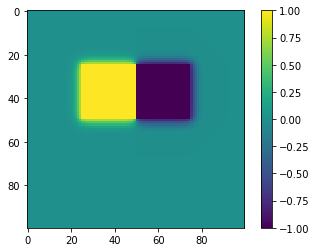

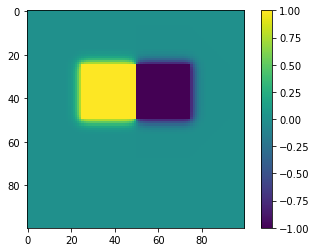

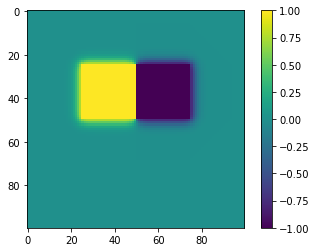

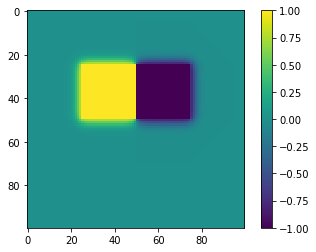

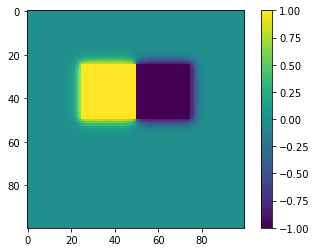

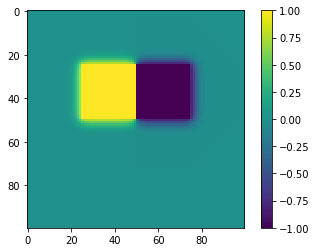

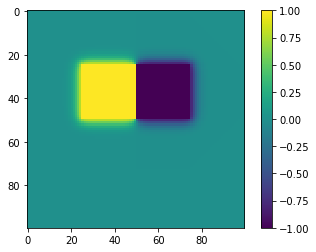

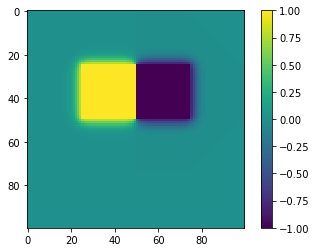

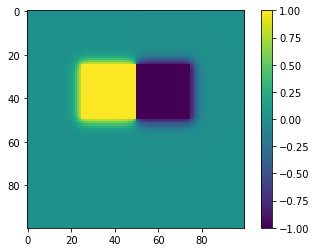

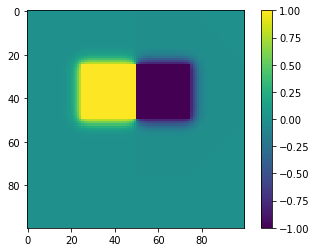

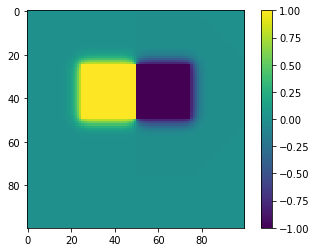

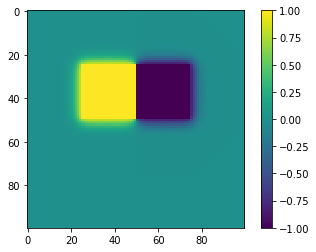

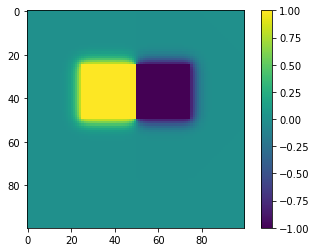

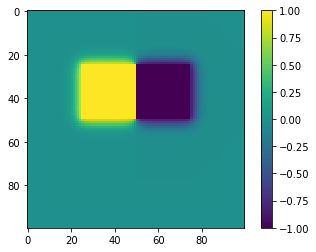

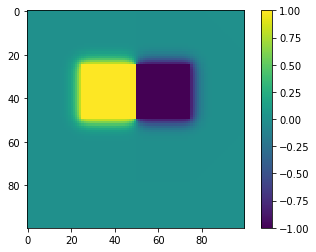

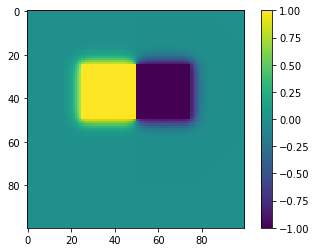

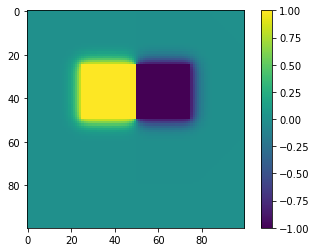

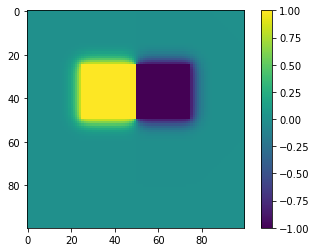

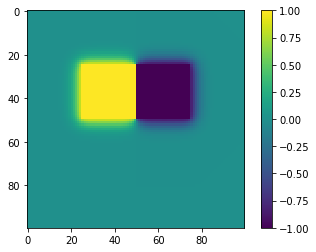

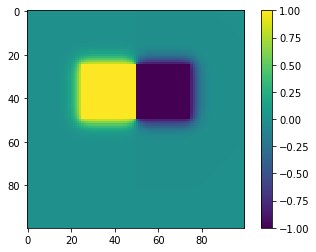

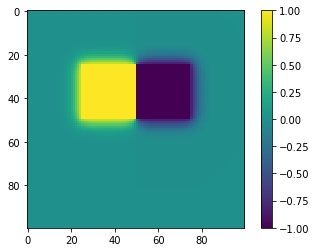

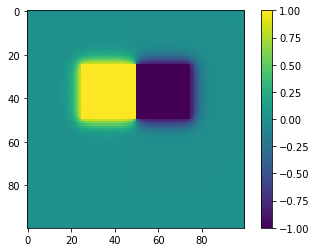

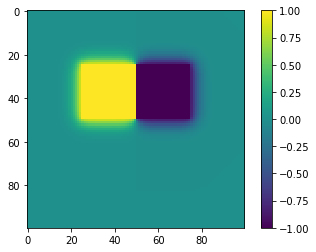

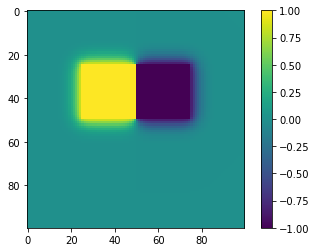

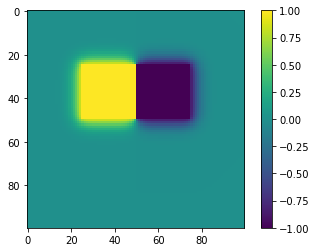

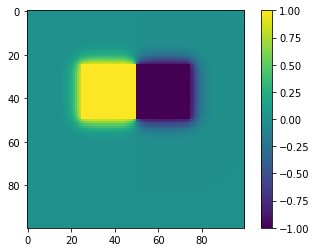

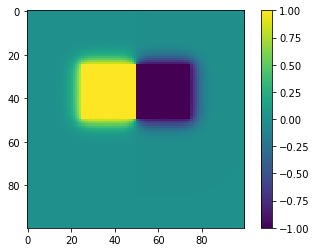

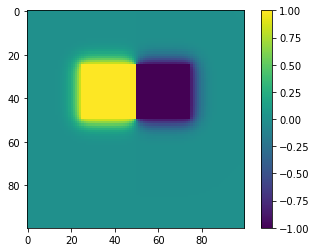

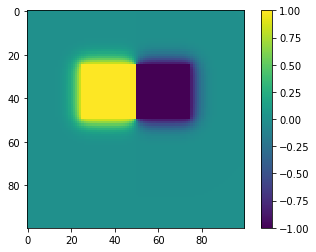

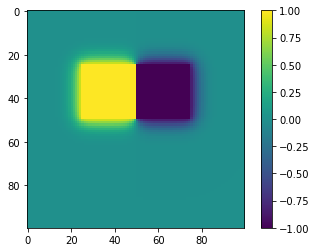

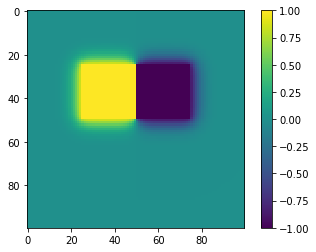

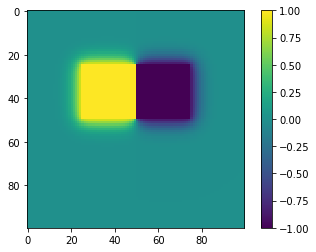

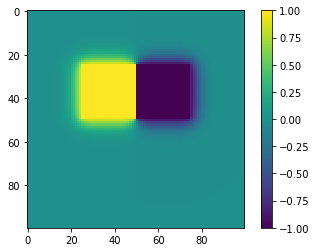

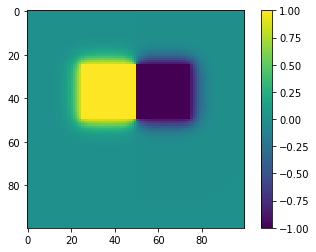

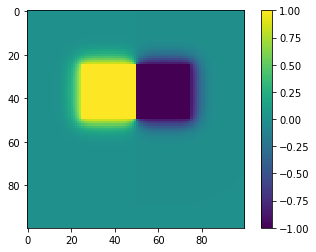

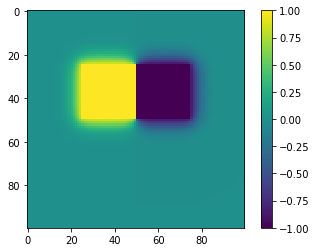

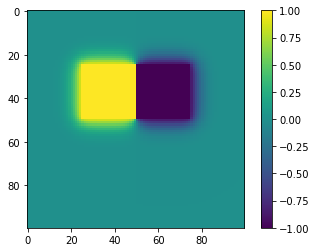

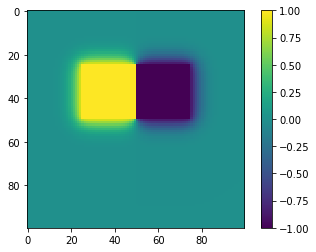

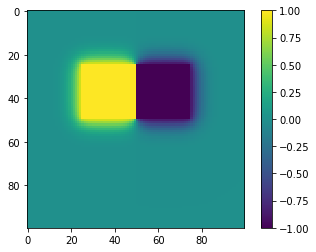

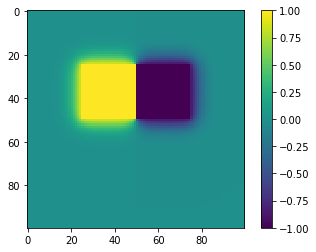

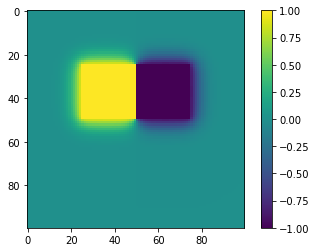

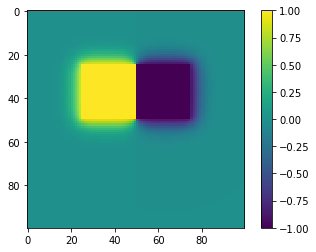

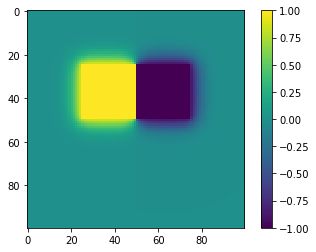

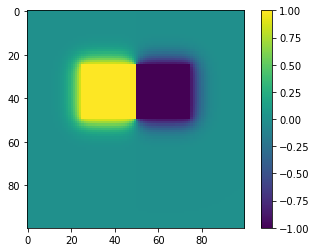

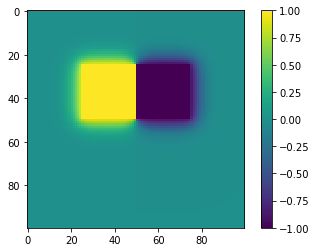

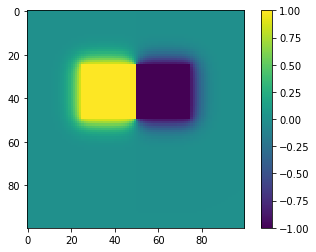

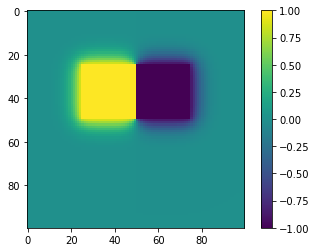

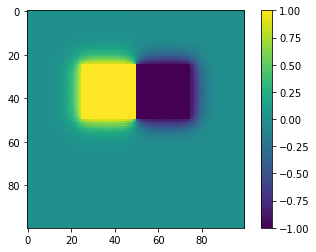

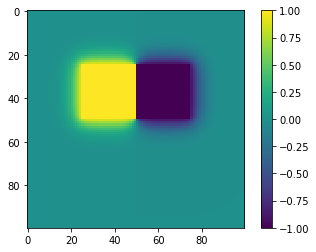

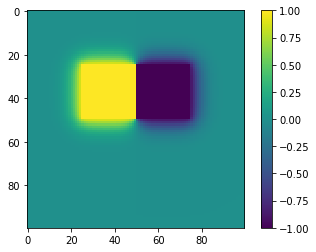

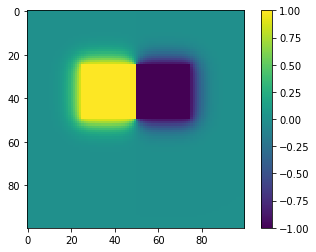

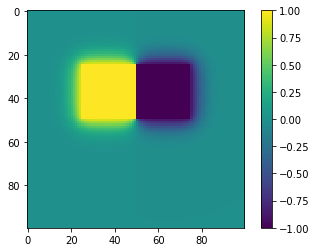

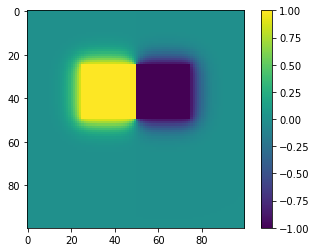

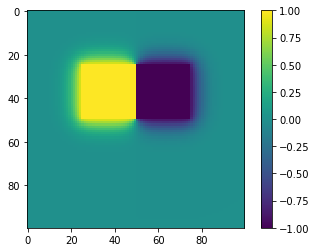

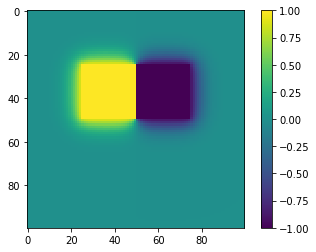

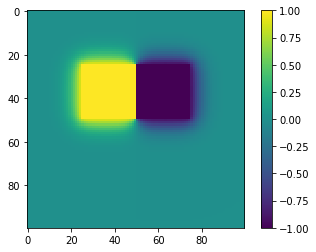

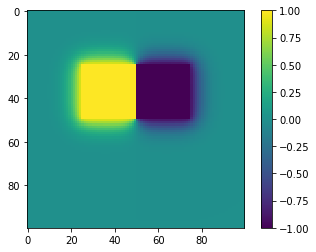

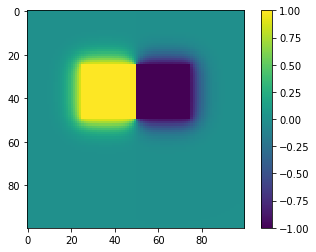

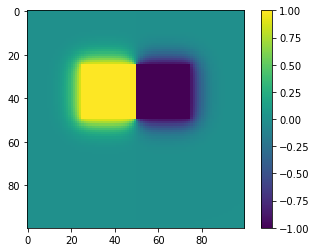

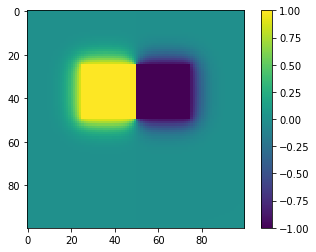

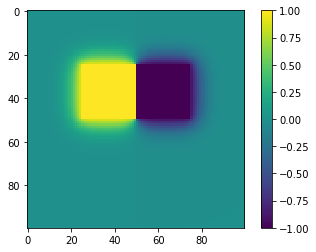

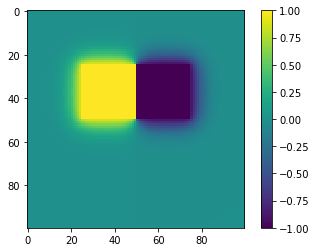

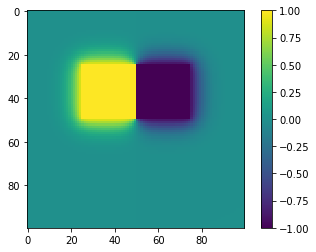

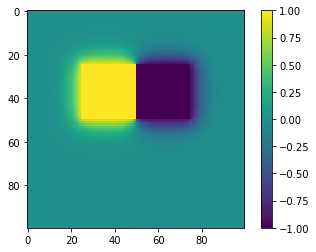

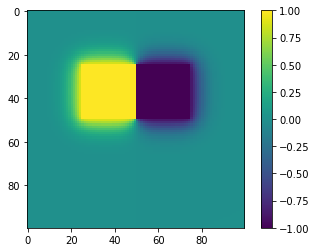

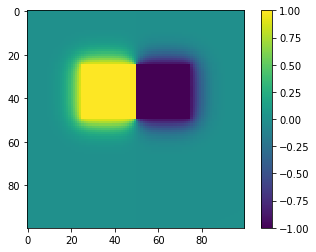

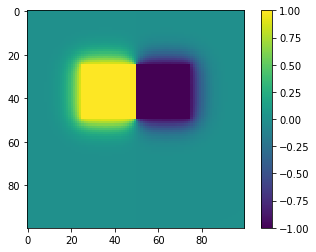

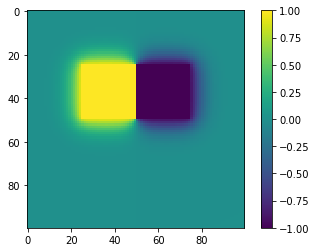

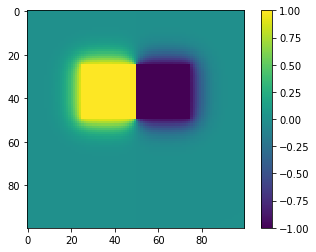

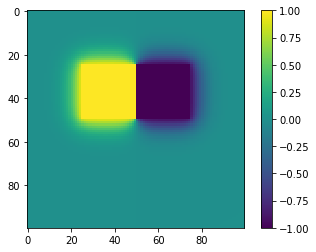

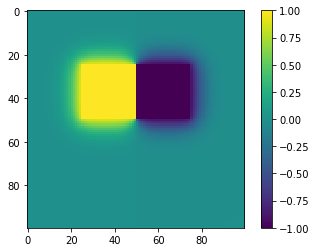

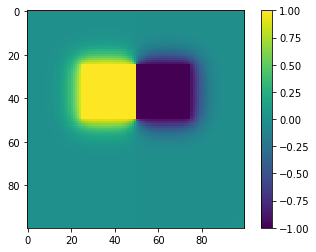

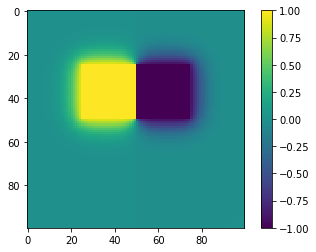

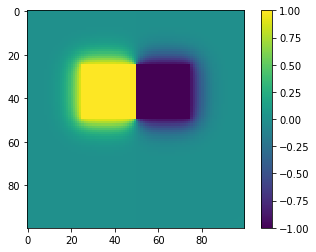

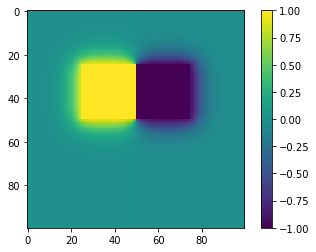

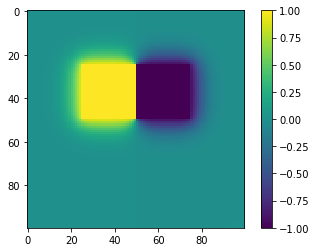

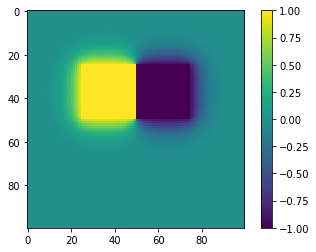

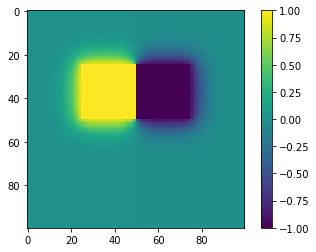

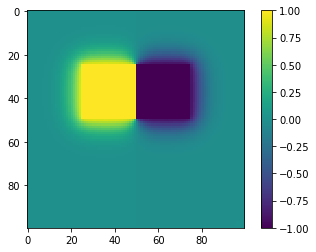

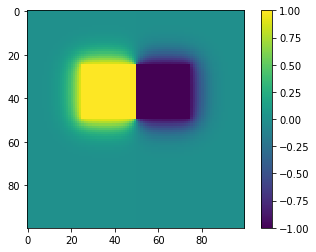

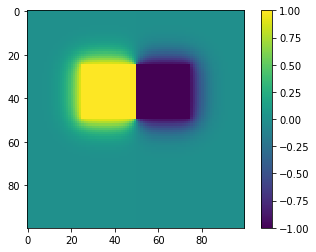

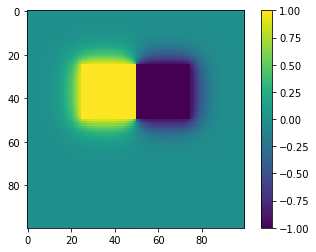

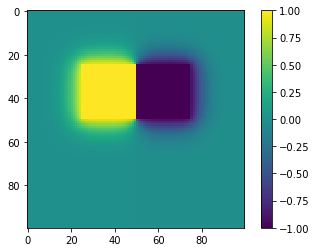

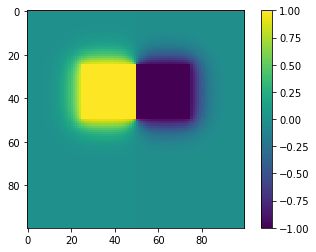

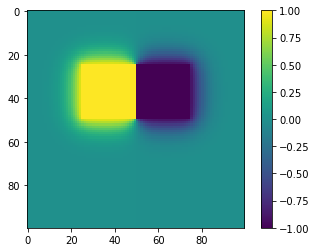

KeyboardInterrupt: 

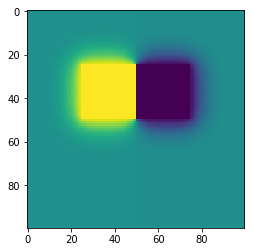

In [4]:
import numpy as np
from matplotlib import pyplot as plt
plt.ion()

n=100

V=np.zeros([n,n])
bc=0*V

mask=np.zeros([n,n],dtype='bool')
mask[:,0]=True
mask[:,-1]=True
mask[0,:]=True
mask[-1,:]=True
#mask[n//2,n//4:(3*n)//4]=True
mask[n//4:n//2,n//4:n//2]=True
bc[n//4:n//2,n//4:n//2]=1.0
mask[n//4:n//2,n//2:(3*n)//4]=True
bc[n//4:n//2,n//2:(3*n)//4]=-1.0


#bc[n//2,n//4:(3*n)//4]=1

V=bc.copy()

for i in range(2*n):
    V[1:-1,1:-1]=(V[1:-1,0:-2]+V[1:-1,2:]+V[:-2,1:-1]+V[2:,1:-1])/4.0
    V[mask]=bc[mask]
    plt.clf()
    plt.imshow(V)
    plt.colorbar()
    plt.pause(1)
rho=V[1:-1,1:-1]-(V[1:-1,0:-2]+V[1:-1,2:]+V[:-2,1:-1]+V[2:,1:-1])/4.0